In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [5]:
titles['decade'] = titles.year // 10 * 10

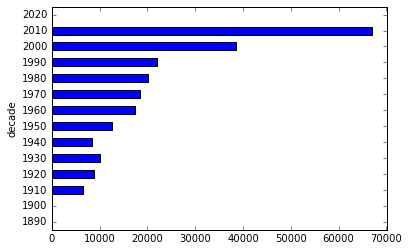

In [6]:
titles.groupby(["decade"]).title.count().plot(kind="barh")

### Use groupby() to plot the number of "Hamlet" films made each decade.

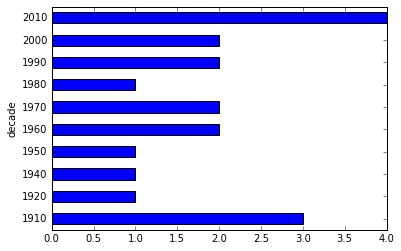

In [8]:
titles[titles.title == "Hamlet"].groupby(["decade"]).size().plot(kind="barh")

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [12]:
totalforactor = {}
for i in range(1950,1960):
    totalforactor[i] = cast[(cast.n == 1)&(cast.year == i)&(cast.type=="actor")].n.count()
totalforactor

{1950: 618,
 1951: 644,
 1952: 602,
 1953: 654,
 1954: 637,
 1955: 629,
 1956: 640,
 1957: 726,
 1958: 703,
 1959: 710}

In [13]:
totalforactress = {}
for i in range(1950,1960):
    totalforactress[i] = cast[(cast.n == 1)&(cast.year == i)&(cast.type=="actress")].n.count()
totalforactress

{1950: 278,
 1951: 279,
 1952: 290,
 1953: 298,
 1954: 307,
 1955: 280,
 1956: 302,
 1957: 300,
 1958: 292,
 1959: 314}

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [14]:
nactor = {}
for i in range(1,6):
    nactor[i] = cast[(cast.n == i)&(cast.type=="actor")].n.count()
nactor

{1: 100447, 2: 73605, 3: 81210, 4: 78406, 5: 77403}

In [15]:
nactress = {}
for i in range(1,6):
    nactress[i] = cast[(cast.n == i)&(cast.type=="actress")].n.count()
nactress

{1: 44816, 2: 62285, 3: 47936, 4: 44514, 5: 39189}

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [71]:
cast[cast.title == "Pink Panther"].groupby("character").size()

Series([], dtype: int64)

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [73]:
for i in cast[(cast.name == "Frank Oz")].groupby(["title"]):
    if i[1].character.count()>=2:
        print(i[1].title)

1638044    An American Werewolf in London
1638045    An American Werewolf in London
Name: title, dtype: object
1638047    Follow That Bird
1638048    Follow That Bird
1638049    Follow That Bird
Name: title, dtype: object
1638054    Muppet Treasure Island
1638055    Muppet Treasure Island
1638056    Muppet Treasure Island
1638057    Muppet Treasure Island
Name: title, dtype: object
1638058    Muppets from Space
1638059    Muppets from Space
1638060    Muppets from Space
1638061    Muppets from Space
Name: title, dtype: object
1638071    The Adventures of Elmo in Grouchland
1638072    The Adventures of Elmo in Grouchland
1638073    The Adventures of Elmo in Grouchland
Name: title, dtype: object
1638075    The Dark Crystal
1638076    The Dark Crystal
Name: title, dtype: object
1638077    The Great Muppet Caper
1638078    The Great Muppet Caper
1638079    The Great Muppet Caper
1638080    The Great Muppet Caper
1638081    The Great Muppet Caper
1638082    The Great Muppet Caper
Name: titl

### List each of the characters that Frank Oz has portrayed at least twice.

In [74]:
for i in cast[(cast.name == "Frank Oz")].groupby(["character"]):
    if i[1].character.count()>=2:
        print(i[1].character)

1638057    Animal
1638060    Animal
1638079    Animal
1638086    Animal
1638092    Animal
1638100    Animal
Name: character, dtype: object
1638048    Bert
1638071    Bert
1638101    Bert
Name: character, dtype: object
1638047    Cookie Monster
1638073    Cookie Monster
1638102    Cookie Monster
Name: character, dtype: object
1638055    Fozzie Bear
1638059    Fozzie Bear
1638078    Fozzie Bear
1638091    Fozzie Bear
Name: character, dtype: object
1638049    Grover
1638072    Grover
Name: character, dtype: object
1638045    Miss Piggy
1638054    Miss Piggy
1638058    Miss Piggy
1638077    Miss Piggy
1638090    Miss Piggy
1638098    Miss Piggy
Name: character, dtype: object
1638056    Sam the Eagle
1638061    Sam the Eagle
1638080    Sam the Eagle
1638093    Sam the Eagle
1638104    Sam the Eagle
Name: character, dtype: object
1638063    Yoda
1638064    Yoda
1638065    Yoda
1638066    Yoda
1638067    Yoda
1638068    Yoda
1638069    Yoda
Name: character, dtype: object
